У завданні 1 CNN показала кращі результати, ніж NN у модулі 12 - 91% точності на тестових даних проти 89% та 95% проти 93% на тренувальних даних. 

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28, 1), (60000,), (10000, 28, 28, 1), (10000,))

In [ ]:
def plot_history(hst):
    plt.figure(figsize=(13, 4))

    plt.subplot(1, 2, 1)
    plt.plot(hst.history['loss'], label='train')
    plt.plot(hst.history['val_loss'], label='test')
    plt.title('Loss')

    plt.subplot(1, 2, 2)
    plt.plot([round(100*e, 2) for e in hst.history['accuracy']], label='train')
    plt.plot([round(100*e, 2) for e in hst.history['val_accuracy']], label='test')
    plt.title('Accuracy')

    plt.ylim(0, 100)
    plt.legend()
    plt.tight_layout()
    plt.show()


In [ ]:

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    Flatten(),

    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_33 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_34 (Conv2D)                   │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_35 (Conv2D)                   │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 128)                 │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 249,162 (973.29 KB)

 Trainable params: 249,162 (973.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(x_train, y_train,
                    epochs=50,
                    batch_size=64,
                    validation_split=0.2,
                    callbacks=[early_stopping])

Epoch 1/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 56s 72ms/step - accuracy: 0.6983 - loss: 0.8244 - val_accuracy: 0.8637 - val_loss: 0.3733
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 53s 71ms/step - accuracy: 0.8657 - loss: 0.3600 - val_accuracy: 0.8760 - val_loss: 0.3410
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 71ms/step - accuracy: 0.8902 - loss: 0.2954 - val_accuracy: 0.8970 - val_loss: 0.2869
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 69ms/step - accuracy: 0.9071 - loss: 0.2547 - val_accuracy: 0.8969 - val_loss: 0.2884
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 70ms/step - accuracy: 0.9141 - loss: 0.2323 - val_accuracy: 0.8976 - val_loss: 0.2863
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 70ms/step - accuracy: 0.9232 - loss: 0.2078 - val_accuracy: 0.8942 - val_loss: 0.2904
Epoch 7/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 70ms/step - accuracy: 0.9281 - loss: 0.1927 - val_accuracy: 0.9030 - val_loss: 0.2727
Epoch 8/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 53s 70ms/step - accuracy: 0.9359 - loss: 0.1741 - 

In [ ]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

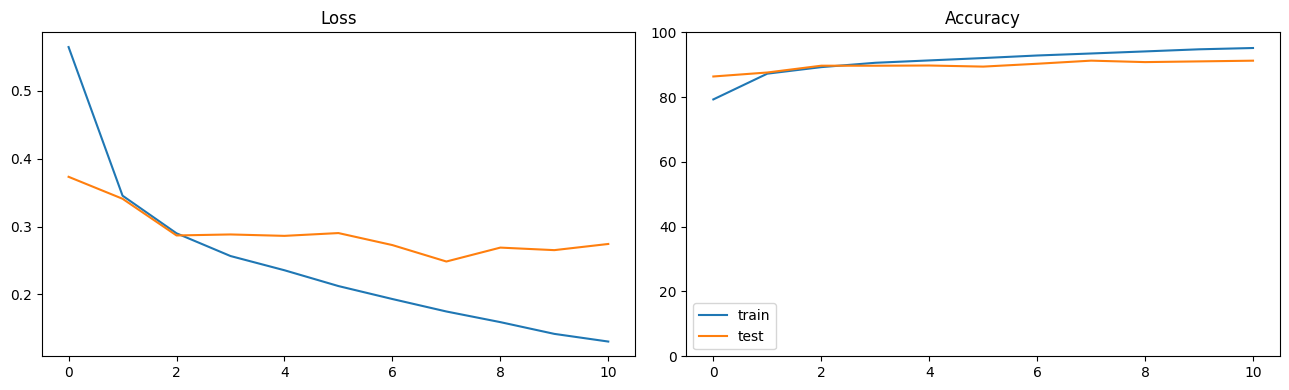

In [ ]:
plot_history(history)